In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


2025-09-28 10:31:05.354587: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#generate some example sequential data
import numpy as np
#create a simple sine wave dataset
def create_sine_wave_dataset(seq_length=100):
    X = np.linspace(0, 50, seq_length)
    Y = np.sin(X)
    return Y

data = create_sine_wave_dataset()
time_steps = np.arange(len(data))

In [3]:
#prepare the dataset
def prepare_data(data, time_steps, time_window):
    X, Y = [], []
    for i in range(len(data) - time_window):
        X.append(data[i:i + time_window])
        Y.append(data[i + time_window])
    
    return np.array(X), np.array(Y)
time_window = 10
X, Y  = prepare_data(data, time_steps, time_window)


In [6]:
#reshape the data to match RNN input shape
X = X.reshape((X.shape[0], X.shape[1], 1))

#Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(time_window, 1)),
    Dense(1)
])

I0000 00:00:1759036285.640614  170669 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2305 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
/home/shobhit/.local/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


2025-09-28 10:46:21.722466: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f4cb40d48e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-28 10:46:21.722484: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-09-28 10:46:21.742149: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-28 10:46:21.840945: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


1/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.6135

I0000 00:00:1759036582.379162  182008 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.4959
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2744 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1634 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1025 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0513 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0347 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9562e-04 
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7554e-04 
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2241e-04 
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7789e-04 
Epoch 16/20
6/6 ━━━━━━━━━━━━

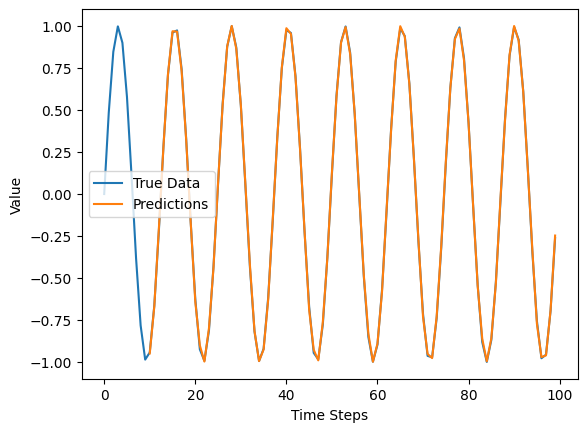

In [7]:
#compile the model
model.compile(optimizer='adam', loss='mse')

model.fit(X, Y, epochs=20, batch_size=16)

#make predictions()
predictions = model.predict(X)

#plot the results
import matplotlib.pyplot as plt
plt.plot(time_steps, data, label='True Data')
plt.plot(time_steps[time_window:], predictions, label='Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()